## Fuzzy Logic in Pyhton - Example

Adapted from: [pythonhosted.org](https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)

The problem is to define the tip value in a restaurant based on the quality of the service and the food.

* **Input (antecedents):** 

> INPUT 1: Food Quality
Universe (range of crisp values): 0 to 10
Fuzzy set (fuzzy values): rancid, edible, delicious

> INPUT 2: Quality of Service
Universe (range of crisp values): 0 to 10
Fuzzy set (fuzzy values): poor, good, excellent

* **Output (consequent):**

> OUTPUT 1: Tip 
Universe (crisp values): 0 to 25%
Fuzzy set (fuzzy values): cheap, average, generous

### Rules

**IF** service is excelent **OR** food is delicious **THEN** tip is generous

**IF** service is good **THEN** tip is average

**IF** service is porr **AND** food is rancid **THEN** tip is cheap



In [1]:
# If necessary, install the skfuzzy package
#!pip install networkx==2.3
#!pip install scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create the problem variables
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Automatically creates mapping between crisp and fuzzy values
# using a standard membership function (triangle)
food.automf(names=['rancid', 'edible', 'delicious'])


# Creates membership functions using different types
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['good'] = fuzz.gaussmf(service.universe, 5, 2)
service['excellent'] = fuzz.gaussmf(service.universe, 10,3)

tip['cheap'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['average'] = fuzz.trapmf(tip.universe, [0, 13,15, 25])
tip['generous'] = fuzz.trimf(tip.universe, [15, 25, 25])

### Graphically showing the created parting functions

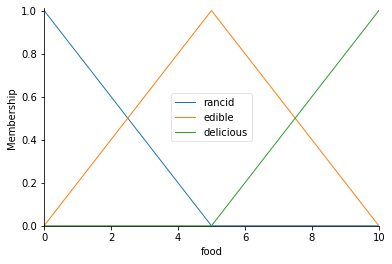

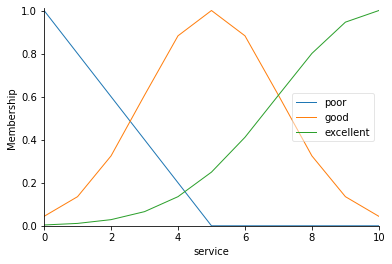

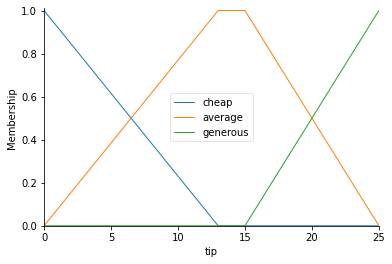

In [3]:
food.view()
service.view()
tip.view()


### Fuzzy rules creation

In [4]:
rule1 = ctrl.Rule(service['excellent'] | food['delicious'], tip['generous'])
rule2 = ctrl.Rule(service['good'], tip['average'])
rule3 = ctrl.Rule(service['poor'] & food['rancid'], tip['cheap'])

### Creating and simulating a fuzzy controller

In [5]:
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tip_simulator = ctrl.ControlSystemSimulation(tip_ctrl)

# Entering some values for quality of food and service
tip_simulator.input['food'] = 3.5
tip_simulator.input['service'] = 9.4

# Computing the result
tip_simulator.compute()
print('Tip:', tip_simulator.output['tip'])


Tip: 18.57604101547121


### Graphically showing the result

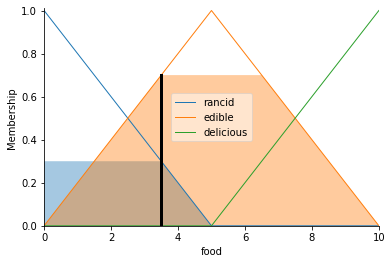

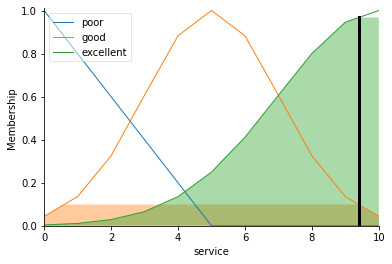

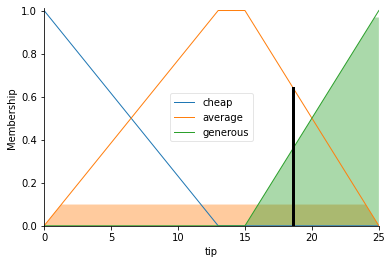

In [27]:
food.view(sim=tip_simulator)
service.view(sim=tip_simulator)
tip.view(sim=tip_simulator)
